***
***

#Problem 1 [2 points]
Write Python code that implements the K-Means algorithm, as given above, to classify the data.
*   Use $K=5$
*   To reduce the sensitivity to initial conditions, your code should choose several (10) random initial conditions and then select the one that results in minimum total error.
*   Provide the final cost, $J$


#Problem 2 [3 points]
Repeat what you did in Problem 1, except this time, vary the number of clusters.
*   Use $K=2$, $K=4$, and $K=10$.   
*   To reduce the sensitivity to initial conditions, your code for each case should choose several (10) random initial conditions and then select the one that results in minimum total error.
*   Provide the minimum cost, $J_K$, for $K=2, 4, 10$

  Use the data that is generated in the following code to test your code.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
blob_centers = np.array(
    [[ 0.2,  2],
     [-1.5 ,  2],
     [-3,  1.8],
     [-3,  3],
     [-3,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=17)

Text(0, 0.5, '$x_2$')

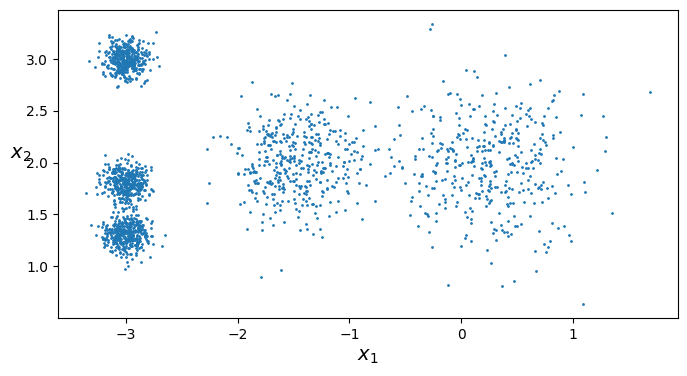

In [4]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1],  s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)


Final Cost (J) for K= 5 is : 226.17708645118122


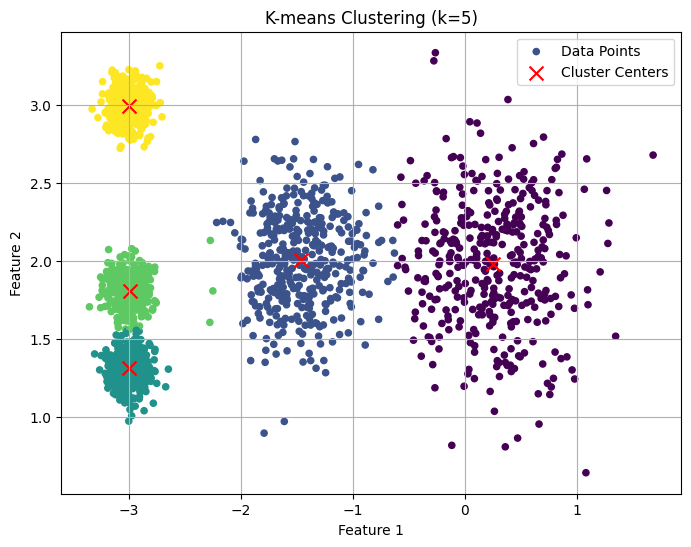

Final Cost (J) for K= 2 is : 1373.7091904430413
Final Cost (J) for K= 4 is : 275.46871263787443
Final Cost (J) for K= 10 is : 110.16547495002447


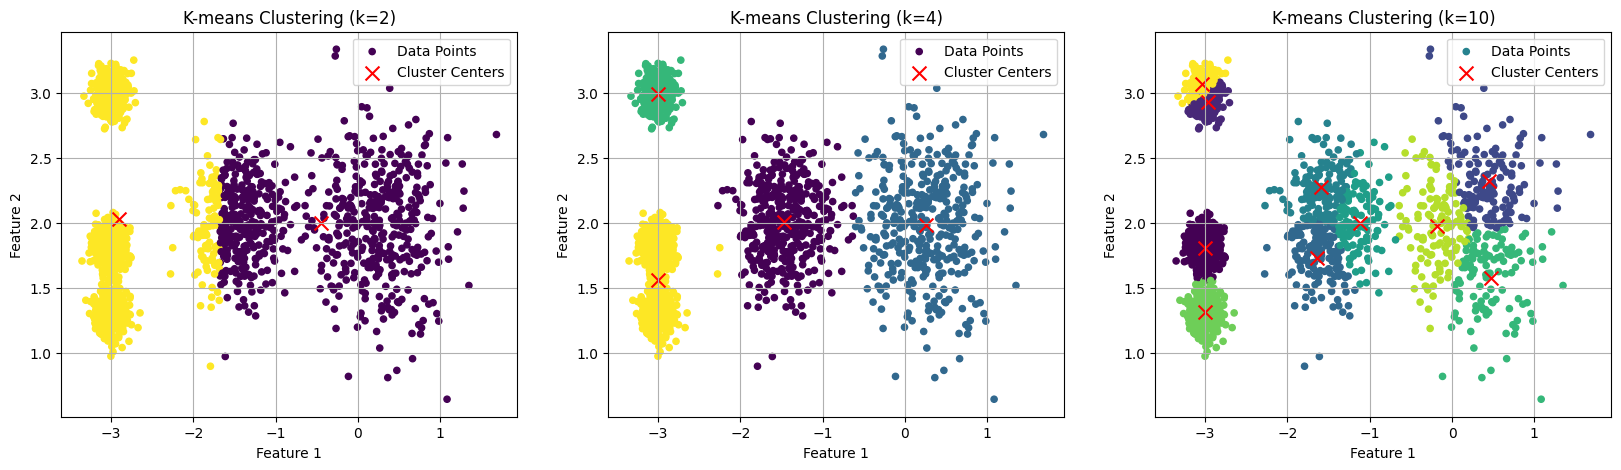

In [5]:
#Solution 1

from sklearn.cluster import KMeans

#Number of Clusters
k = 5

#K-Means model with different centroid seeds =10
kmeans = KMeans(n_clusters=k, init='random', n_init=10)

#Fit Model
kmeans.fit(X)

#Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

#Calculate the final cost (J)
J = kmeans.inertia_

#Final Cost
print(f"Final Cost (J) for K= {k} is : {J}")

#Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=20, label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title(f'K-means Clustering (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#Solution 2

K=np.array([2,4,10])
plt.figure(figsize=(20, 5))

for i in range(len(K)):
  k = K[i]
  kmeans = KMeans(n_clusters=k, init='random', n_init=10)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
  cluster_centers = kmeans.cluster_centers_
  J = kmeans.inertia_
  print(f"Final Cost (J) for K= {k} is : {J}")
  plt.subplot(1,3, i+1)
  plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=20, label='Data Points')
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
  plt.title(f'K-means Clustering (k={k})')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.grid(True)

plt.show()